# **Exploratory Data Analysis of the IMDB Movie data and Recommendations**

The purpose of this data analysis is to provide data driven recommendations to the SussexBudgetProductions company. This analysis will help the company to make insightful decisions regarding which movie they should produce in order to make good returns, within their specified budget.

As a Data Scientist, I am planning to analysis the hidden trends in the data of the movie_metadata.csv. My approach to this problem is to find which movies have higher Return on Investment(ROI). By which movies, I mean, the genre of the movie, the language, the market in which it should be released within the company’s budget.

In [90]:
#Uncomment this cell if you are running this in jupyter notebook(Anaconda)
#update the movie_metadata (1).csv loaction according to your computer location
#myfile='/Users/alishashaik/Downloads/movie_metadata (1).csv'

In [91]:
#Uncomment this cell if you are working in colab
#you don't need it and it will cause a ModuleNotFoundError on Anaconda
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#this is a code cell. Write the code that you want to do things in it. Leave some comments with the code to 
#explain what you are doing, where appropriate. 


#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

# Giving the location from where the data needs to be taken.
myfile='/content/drive/MyDrive/Colab Notebooks/Data Science research methods/Assignments/Assignment 3 Report/movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)

#display the 'head' of the data
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [93]:
#Getting the column info
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## **Data Pre-processing**

In [94]:
#a quick statistic summary of numeric data
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [95]:
df.shape

(5043, 28)

In [96]:
#Checking the datatype of each column
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [97]:
#Checking the columns for NaN values
list1=df.columns
for i in list1:
    output=df[i].isnull().sum()
    print( "{}, {} ".format(i,output))
    

color, 19 
director_name, 104 
num_critic_for_reviews, 50 
duration, 15 
director_facebook_likes, 104 
actor_3_facebook_likes, 23 
actor_2_name, 13 
actor_1_facebook_likes, 7 
gross, 884 
genres, 0 
actor_1_name, 7 
movie_title, 0 
num_voted_users, 0 
cast_total_facebook_likes, 0 
actor_3_name, 23 
facenumber_in_poster, 13 
plot_keywords, 153 
movie_imdb_link, 0 
num_user_for_reviews, 21 
language, 12 
country, 5 
content_rating, 303 
budget, 492 
title_year, 108 
actor_2_facebook_likes, 13 
imdb_score, 0 
aspect_ratio, 329 
movie_facebook_likes, 0 


In [98]:
#Dropping the NaN values in gross and budget columns, because replacing them with median will be creating outliers.
df.dropna(subset=["gross","budget"],inplace=True)

In [99]:
#Creating two list for Categorical columns and Interger/float columns.
Object_list=[]
interger_list=[]
for  i in list1:
    output=df[i].dtype
    if output=='object':
       Object_list=Object_list+[i]
    else:
       interger_list.append(i)

#Seperating string columns and interger columns into 2 different lists
print(Object_list)
print(interger_list)

['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [100]:
#Checking their lenghts
print(len(Object_list))
print(len(interger_list))

12
16


In [101]:
#Getting the counts of NaN values, for columns in Object_list
object_list_Nan=[]
for i in Object_list:
    output1=df[i].isnull().sum()
    if output1 !=0:
       object_list_Nan.append(i)
       print( "{}, {} ".format(i,output1))

color, 2 
actor_2_name, 5 
actor_1_name, 3 
actor_3_name, 10 
plot_keywords, 31 
language, 3 
content_rating, 51 


In [102]:
#Creating dictionary with each key pairs as column name and their mode value.
dict1={}
for i in object_list_Nan:
    dict1[i]=df[i].mode().values[0]
    my_series = pd.Series(dict1)
    object_df=my_series.to_frame('Mode')
    
object_df

,Mode
color,Color
actor_2_name,Morgan Freeman
actor_1_name,Robert De Niro
actor_3_name,Steve Coogan
plot_keywords,1940s|child hero|fantasy world|orphan|referenc...
language,English
content_rating,R


In [103]:
# Finding the total sum of int/float datatype columns which have NaN values
for i in interger_list:
    output2=df[i].isnull().sum()
    if output2 !=0:
      print( "{}, {} ".format(i,output2))

num_critic_for_reviews, 1 
duration, 1 
actor_3_facebook_likes, 10 
actor_1_facebook_likes, 3 
facenumber_in_poster, 6 
actor_2_facebook_likes, 5 
aspect_ratio, 75 


In [104]:
#Creating dictionary with each key pairs as column name and their median value.
dict2={}
for i in interger_list:
    dict2[i]=df[i].median()
    my_series = pd.Series(dict2)
    integer_df=my_series.to_frame('Median')
    
integer_df

,Median
num_critic_for_reviews,134.00
duration,106.00
director_facebook_likes,58.00
actor_3_facebook_likes,427.00
actor_1_facebook_likes,1000.00
gross,27979400.00
num_voted_users,50415.00
cast_total_facebook_likes,3888.00
facenumber_in_poster,1.00
num_user_for_reviews,203.00


In [105]:
#Replacing Nan values with mode and medain for categorical and numerical data
for column in df:
    if df[column].isnull().any():
        if(column in Object_list):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column].fillna(df[column].median(), inplace=True)

In [106]:
#converting gross and budget columns into million format for easy readability
df['gross (in millions)']=df['gross']/1000000
df['budget (in millions)']=df['budget']/1000000
df.drop(['gross','budget'], axis=1, inplace=True)

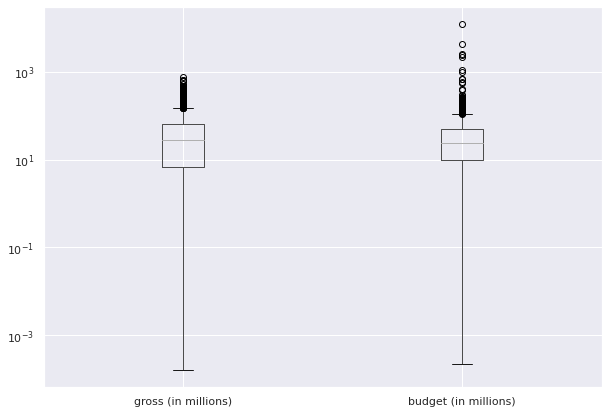

In [107]:
#boxplot showing outliers
fig=plt.figure(figsize=(10,7))
plt.yscale("log")
boxplot=df.boxplot(column=['gross (in millions)','budget (in millions)'])
boxplot

In [108]:
#filtering ouliers in gross column
q_low = df["gross (in millions)"].quantile(0.01)
q_hi  = df["gross (in millions)"].quantile(0.99)

In [109]:
print(q_low, q_hi)

0.0106772 336.07963429999995


In [110]:
#removing outliers
df_filtered_gross = df[(df["gross (in millions)"] < q_hi) & (df["gross (in millions)"] > q_low)]

In [111]:
df_filtered_gross.shape

(3813, 28)

In [112]:
#checking for ouliers in budget column
q_low = df_filtered_gross["budget (in millions)"].quantile(0.01)
q_hi  = df_filtered_gross["budget (in millions)"].quantile(0.99)

In [113]:
print(q_low, q_hi)

0.15 200.0


In [114]:
#removing outliers
df_filtered_budget = df[(df["budget (in millions)"] < q_hi) & (df["budget (in millions)"] > q_low)]

In [115]:
df_filtered_budget.shape

(3778, 28)

In [116]:
df_filtered=df_filtered_budget

In [117]:
df_filtered.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross (in millions),budget (in millions)
24,Color,Chris Weitz,251.0,113.0,129.0,1000.0,Eva Green,16000.0,Adventure|Family|Fantasy,Christopher Lee,The Golden Compass,149019,24106,Kristin Scott Thomas,2.0,children|epic|friend|girl|quest,http://www.imdb.com/title/tt0385752/?ref_=fn_t...,666.0,English,USA,PG-13,2007.0,6000.0,6.1,2.35,0,70.083519,180.0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,2015.0,2000.0,7.0,2.00,150000,652.177271,150.0
40,Color,Joseph Kosinski,469.0,125.0,364.0,1000.0,Olivia Wilde,12000.0,Action|Adventure|Sci-Fi,Jeff Bridges,TRON: Legacy,264183,25550,James Frain,0.0,arcade|bridge|disappearance|escape|warrior,http://www.imdb.com/title/tt1104001/?ref_=fn_t...,665.0,English,USA,PG,2010.0,10000.0,6.8,2.35,30000,172.051787,170.0
45,Color,James Wan,424.0,140.0,0.0,14000.0,Paul Walker,26000.0,Action|Crime|Thriller,Jason Statham,Furious 7,278232,79150,Vin Diesel,0.0,car falling off a cliff|hospital|revenge|star ...,http://www.imdb.com/title/tt2820852/?ref_=fn_t...,657.0,English,USA,PG-13,2015.0,23000.0,7.2,2.35,94000,350.034110,190.0
46,Color,Marc Forster,654.0,123.0,395.0,1000.0,Brad Pitt,17000.0,Action|Adventure|Horror|Sci-Fi|Thriller,Peter Capaldi,World War Z,465019,32392,Mireille Enos,0.0,chaos|disease|infection|pandemic|zombie,http://www.imdb.com/title/tt0816711/?ref_=fn_t...,995.0,English,USA,PG-13,2013.0,11000.0,7.0,2.35,129000,202.351611,190.0


In [118]:
#dropping columns which has less information 
df_filtered.drop(['color'],axis=1, inplace=True)
df_filtered.drop(['movie_imdb_link'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
#checking counts after NaN replacement
df_filtered.count()

director_name                3778
num_critic_for_reviews       3778
duration                     3778
director_facebook_likes      3778
actor_3_facebook_likes       3778
actor_2_name                 3778
actor_1_facebook_likes       3778
genres                       3778
actor_1_name                 3778
movie_title                  3778
num_voted_users              3778
cast_total_facebook_likes    3778
actor_3_name                 3778
facenumber_in_poster         3778
plot_keywords                3778
num_user_for_reviews         3778
language                     3778
country                      3778
content_rating               3778
title_year                   3778
actor_2_facebook_likes       3778
imdb_score                   3778
aspect_ratio                 3778
movie_facebook_likes         3778
gross (in millions)          3778
budget (in millions)         3778
dtype: int64

In [120]:
#checking datatypes after NaN replacement in columns
df_filtered.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
gross (in millions)          float64
budget (in millions)         float64
dtype: object

In [121]:
#ensuring there are no Nan values after replacement
df_filtered.isnull().any()

director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
gross (in millions)          False
budget (in millions)         False
dtype: bool

In [122]:
#Checking for duplicates
df_filtered.duplicated().sum()

33

In [123]:
#examining the duplicates
df_filtered.loc[df_filtered.duplicated(), :].head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross (in millions),budget (in millions)
137,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,239.0,English,USA,PG-13,2016.0,10000.0,6.6,2.35,29000,124.051759,180.0
187,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,59177,Taylor Lautner,3.0,battle|friend|super strength|vampire|vision,329.0,English,USA,PG-13,2012.0,17000.0,5.5,2.35,65000,292.298923,120.0
303,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,21393,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|referenc...,186.0,English,USA,PG,2015.0,548.0,5.8,2.35,24000,34.964818,150.0
389,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,Action|Adventure|Sci-Fi,Tim Blake Nelson,Fantastic Four,110486,1261,Tim Heidecker,3.0,box office flop|critically bashed|portal|telep...,695.0,English,USA,PG-13,2015.0,360.0,4.3,2.35,41000,56.114221,120.0
395,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,Action|Crime|Thriller,Paul Walker,The Fast and the Furious,272223,45327,Jordana Brewster,2.0,eighteen wheeler|illegal street racing|truck|t...,988.0,English,USA,PG-13,2001.0,14000.0,6.7,2.35,14000,144.512310,38.0


In [124]:
(df_filtered.loc[df_filtered.duplicated(), :]).shape

(33, 26)

In [125]:
#dropping the duplicates
df_filtered.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
#ensuring no duplicates after dropping duplicates
df_filtered.duplicated().sum()

0

In [127]:
#count check after duplicate removal
df_filtered.count()

director_name                3745
num_critic_for_reviews       3745
duration                     3745
director_facebook_likes      3745
actor_3_facebook_likes       3745
actor_2_name                 3745
actor_1_facebook_likes       3745
genres                       3745
actor_1_name                 3745
movie_title                  3745
num_voted_users              3745
cast_total_facebook_likes    3745
actor_3_name                 3745
facenumber_in_poster         3745
plot_keywords                3745
num_user_for_reviews         3745
language                     3745
country                      3745
content_rating               3745
title_year                   3745
actor_2_facebook_likes       3745
imdb_score                   3745
aspect_ratio                 3745
movie_facebook_likes         3745
gross (in millions)          3745
budget (in millions)         3745
dtype: int64

## **Exploratory Data Analysis (EDA)**

In [128]:
#importing label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [129]:
#label encoding all the categorical columns 
label_object = {}
for i in Object_list:
    le=''
    if i not in ('color','movie_imdb_link'):
        #le=le+'_'+'i'
        le=LabelEncoder()
        df_filtered[i]=le.fit_transform(df_filtered[i]) 
        label_object[i]=le

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
#checking head after label encoding
df_filtered.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross (in millions),budget (in millions)
24,239,251.0,113.0,129.0,1000.0,690,16000.0,372,260,2850,149019,24106,1435,2.0,2189,666.0,10,43,7,2007.0,6000.0,6.1,2.35,0,70.083519,180.0
29,276,644.0,124.0,365.0,1000.0,1093,3000.0,107,185,1471,418214,8458,1898,0.0,2801,1290.0,10,43,7,2015.0,2000.0,7.0,2.00,150000,652.177271,150.0
40,852,469.0,125.0,364.0,1000.0,1614,12000.0,106,616,2570,264183,25550,1048,0.0,797,665.0,10,43,6,2010.0,10000.0,6.8,2.35,30000,172.051787,170.0
45,662,424.0,140.0,0.0,14000.0,1667,26000.0,187,606,1072,278232,79150,2532,0.0,2001,657.0,10,43,7,2015.0,23000.0,7.2,2.35,94000,350.034110,190.0
46,1001,654.0,123.0,395.0,1000.0,253,17000.0,98,1096,3638,465019,32392,1785,0.0,2117,995.0,10,43,7,2013.0,11000.0,7.0,2.35,129000,202.351611,190.0


In [131]:
#checking inverse transform feature to decode original values
print(label_object['director_name'].inverse_transform([239]),label_object['actor_2_name'].inverse_transform([1670]))

['Chris Weitz'] ['Paulo Costanzo']


In [132]:
#creating new column ROI(Return on Investment)
df_filtered['ROI(%)']=((df_filtered['gross (in millions)']-df_filtered['budget (in millions)'])/df_filtered['budget (in millions)'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
df_filtered[['ROI(%)']].head()

,ROI(%)
24,-61.064712
29,334.784847
40,1.206934
45,84.228479
46,6.500848


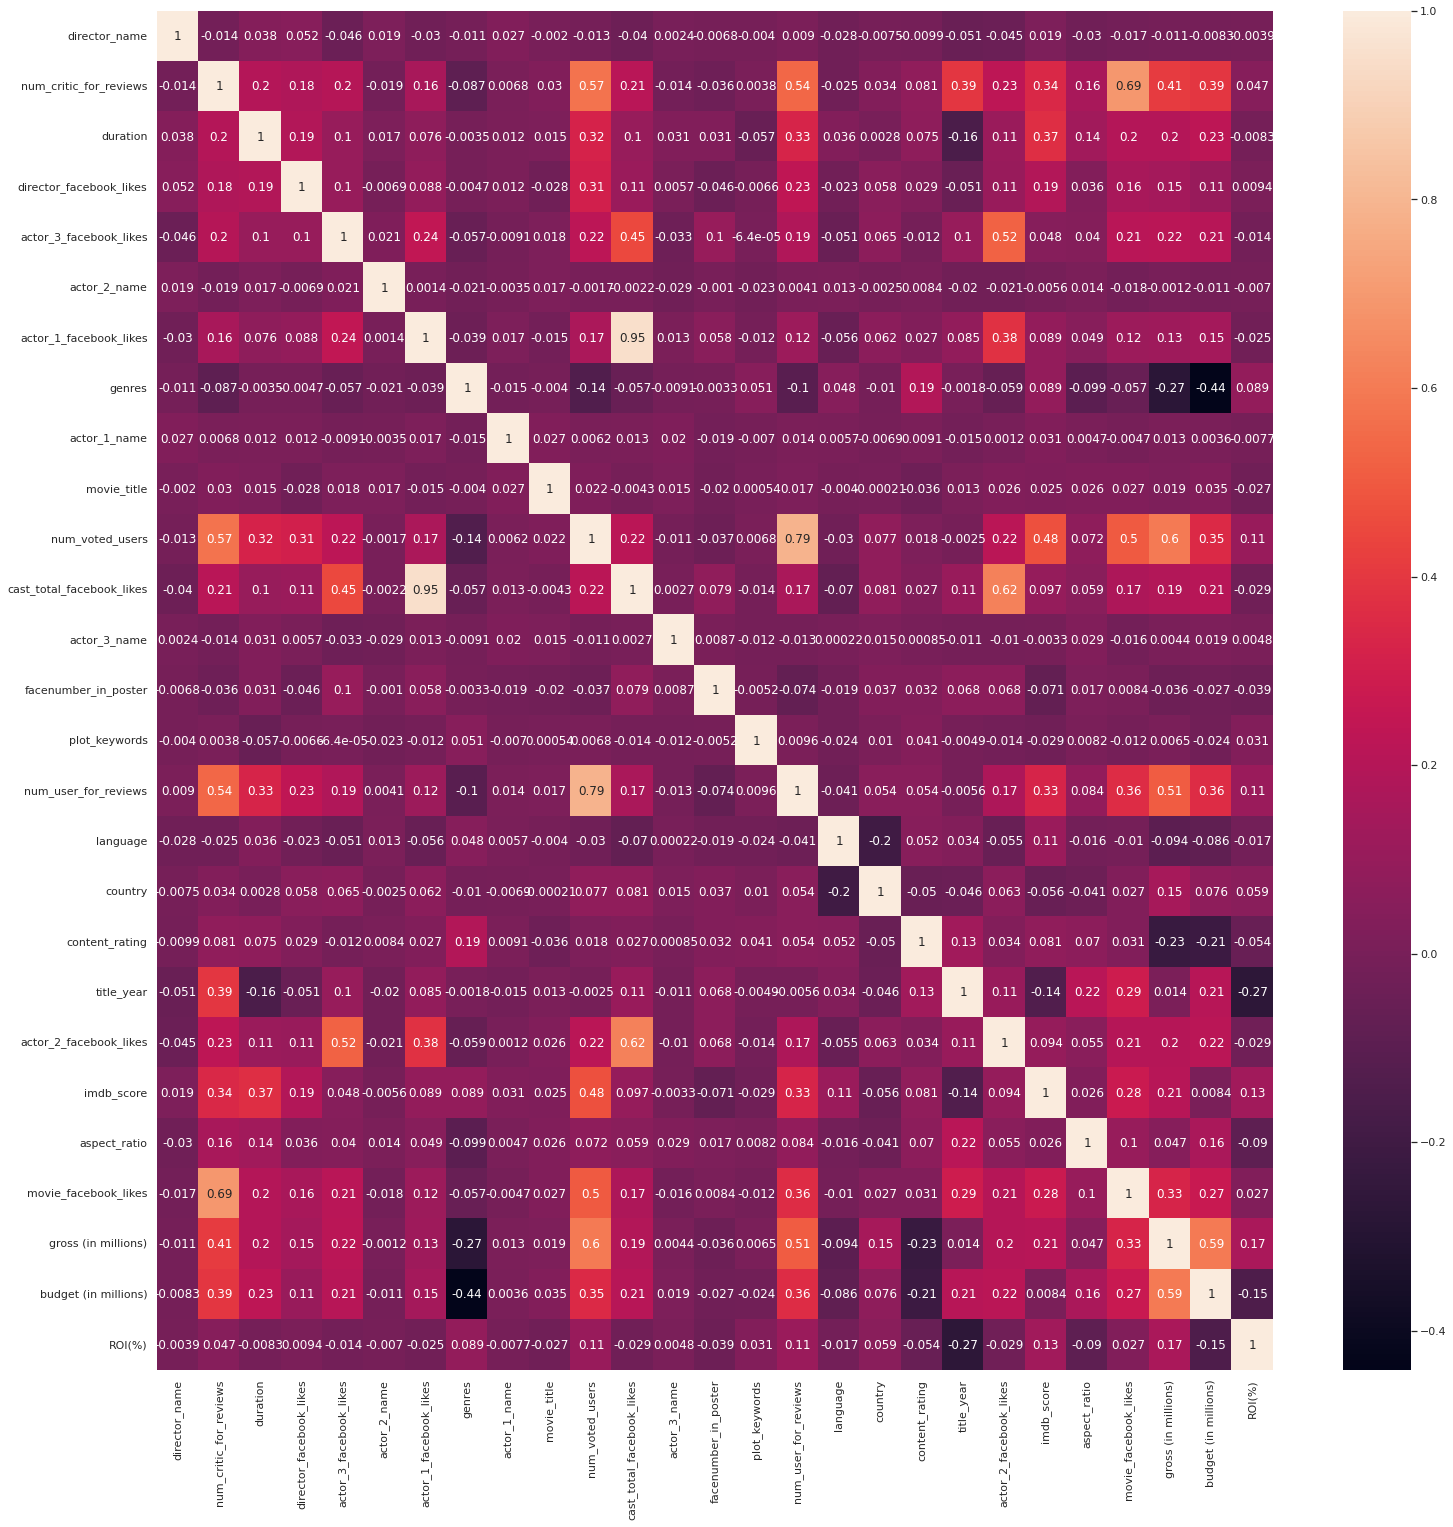

In [134]:
#Importing seaborn
#Using a heatmap for understanding the correlation between columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8.27)})
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_filtered.corr(method ='pearson'), annot = True)

In [135]:
#extracting the highest correlated pairs
corr = df_filtered.corr(method ='pearson').abs()
s = corr.unstack()
sorts = s.sort_values(kind="quicksort", ascending=False)
df_filtered_budget_corr_values=sorts.to_frame('corr_values')
df_filtered_budget_corr_values.sort_values('corr_values', ascending=False)
df_filtered_budget_corr_values=df_filtered_budget_corr_values.iloc[27:49]
df_filtered_budget_corr_values.drop_duplicates(inplace=True)
df_filtered_budget_corr_values

,,corr_values
actor_1_facebook_likes,cast_total_facebook_likes,0.952268
num_voted_users,num_user_for_reviews,0.786125
movie_facebook_likes,num_critic_for_reviews,0.693281
actor_2_facebook_likes,cast_total_facebook_likes,0.622028
gross (in millions),num_voted_users,0.598643
budget (in millions),gross (in millions),0.594531
num_voted_users,num_critic_for_reviews,0.573134
num_user_for_reviews,num_critic_for_reviews,0.543548
actor_2_facebook_likes,actor_3_facebook_likes,0.523560
num_user_for_reviews,gross (in millions),0.507281


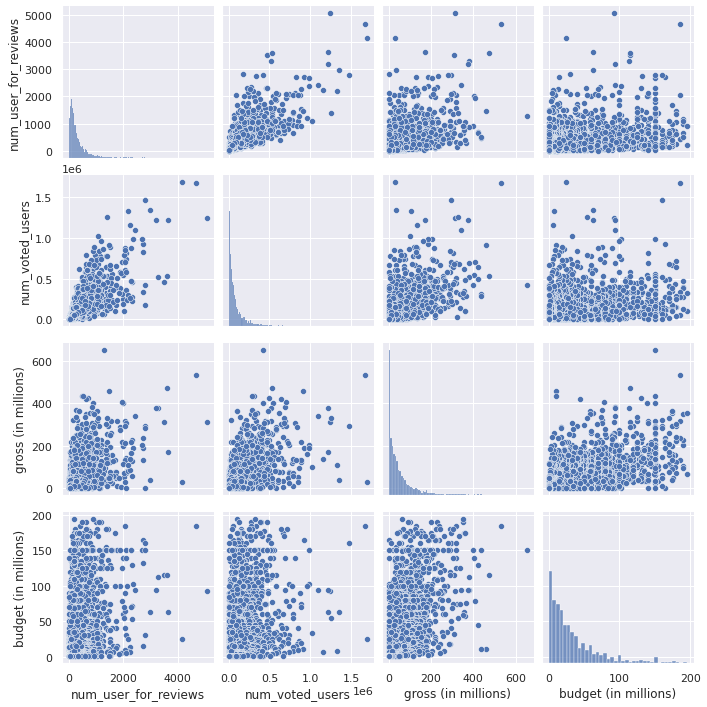

In [136]:
#plotting plots between correlated columns using pairplot
sns.pairplot(df_filtered[['num_user_for_reviews','num_voted_users','gross (in millions)','budget (in millions)']])

In [137]:
#decoding all the encoded categorical columns
for i in Object_list:
    le=''
    if i not in ('color','movie_imdb_link'):
        df_filtered[i]=label_object[i].inverse_transform([i for i in df_filtered[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [138]:
#ensuring decoding of categorical columns
df_filtered.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross (in millions),budget (in millions),ROI(%)
24,Chris Weitz,251.0,113.0,129.0,1000.0,Eva Green,16000.0,Adventure|Family|Fantasy,Christopher Lee,The Golden Compass,149019,24106,Kristin Scott Thomas,2.0,children|epic|friend|girl|quest,666.0,English,USA,PG-13,2007.0,6000.0,6.1,2.35,0,70.083519,180.0,-61.064712
29,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,English,USA,PG-13,2015.0,2000.0,7.0,2.00,150000,652.177271,150.0,334.784847
40,Joseph Kosinski,469.0,125.0,364.0,1000.0,Olivia Wilde,12000.0,Action|Adventure|Sci-Fi,Jeff Bridges,TRON: Legacy,264183,25550,James Frain,0.0,arcade|bridge|disappearance|escape|warrior,665.0,English,USA,PG,2010.0,10000.0,6.8,2.35,30000,172.051787,170.0,1.206934
45,James Wan,424.0,140.0,0.0,14000.0,Paul Walker,26000.0,Action|Crime|Thriller,Jason Statham,Furious 7,278232,79150,Vin Diesel,0.0,car falling off a cliff|hospital|revenge|star ...,657.0,English,USA,PG-13,2015.0,23000.0,7.2,2.35,94000,350.034110,190.0,84.228479
46,Marc Forster,654.0,123.0,395.0,1000.0,Brad Pitt,17000.0,Action|Adventure|Horror|Sci-Fi|Thriller,Peter Capaldi,World War Z,465019,32392,Mireille Enos,0.0,chaos|disease|infection|pandemic|zombie,995.0,English,USA,PG-13,2013.0,11000.0,7.0,2.35,129000,202.351611,190.0,6.500848


### **Grouping by one of the highest correlated column 'num_voted_users' with gross**

In [139]:
#Grouping by one of the highest correlated column 'num_voted_users' with gross
genreseries=df_filtered.groupby('num_voted_users')['imdb_score','budget (in millions)','gross (in millions)','ROI(%)'].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_imdb_user_votes = genreseries[genreseries['imdb_score']>min_imdb_score]
top_imdb_user_votes = top_imdb_user_votes.sort_values('imdb_score', ascending=False)
#print the genres for inspection
top_imdb_user_votes.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,imdb_score,budget (in millions),gross (in millions),ROI(%)
num_voted_users,,,,
1689764,9.3,25.0,28.341469,13.365876
1155770,9.2,6.0,134.821952,2147.032533
1676169,9.0,185.0,533.316061,188.278952
790926,9.0,13.0,57.300000,340.769231
1215718,8.9,94.0,377.019252,301.084311


In [140]:
top_imdb_user_votes.shape

(152, 4)

In [141]:
#extracting rows within the budget of 1.5 million
top_imdb_user_votes.sort_values('budget (in millions)').head(14)

,imdb_score,budget (in millions),gross (in millions),ROI(%)
num_voted_users,,,,
891,8.1,0.160000,0.012438,-92.226250
382240,8.3,0.229575,1.229197,435.422847
3086,8.4,0.500000,0.133778,-73.244400
12631,8.1,0.600000,13.300000,2116.666667
18980,8.3,0.700000,7.830611,1018.658714
422432,8.5,0.806947,32.000000,3865.564033
100890,8.2,0.910000,9.600000,954.945055
414976,8.2,0.960000,3.650677,280.278854
375240,8.1,0.960000,117.235247,12112.004896


In [142]:
#assigning the output to a new dataframe named 'Best_ROI'
Best_ROI=top_imdb_user_votes.sort_values('budget (in millions)').head(14)
#sorting the dataframe on 'ROI'
Best_ROI=Best_ROI.sort_values('ROI(%)', ascending=False).head(10)
Best_ROI

,imdb_score,budget (in millions),gross (in millions),ROI(%)
num_voted_users,,,,
375240,8.1,0.960000,117.235247,12112.004896
422432,8.5,0.806947,32.000000,3865.564033
12631,8.1,0.600000,13.300000,2116.666667
18980,8.3,0.700000,7.830611,1018.658714
100890,8.2,0.910000,9.600000,954.945055
382240,8.3,0.229575,1.229197,435.422847
503509,8.9,1.200000,6.100000,408.333333
414976,8.2,0.960000,3.650677,280.278854
664719,8.4,1.200000,2.812029,134.335750


In [143]:
#merging the dataframes to get other columns data using key 'num_voted_users'
df3=pd.merge(Best_ROI,df_filtered, left_on='num_voted_users', right_on='num_voted_users')
df3.drop(['imdb_score_x','budget (in millions)_x','gross (in millions)_x','ROI(%)_x'],axis=1,inplace=True)
df3[['imdb_score','gross (in millions)','budget (in millions)','ROI(%)']]=df3[['imdb_score_y','gross (in millions)_y','budget (in millions)_y','ROI(%)_y']]
df3.drop(['imdb_score_y','gross (in millions)_y','budget (in millions)_y','ROI(%)_y'], axis=1, inplace=True)
df3

,num_voted_users,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,gross (in millions),budget (in millions),ROI(%)
0,375240,John G. Avildsen,141.0,145.0,80.0,794.0,Burgess Meredith,13000.0,Drama|Sport,Sylvester Stallone,Rocky,16094,Carl Weathers,0.0,boxer|hometown hero|philadelphia pennsylvania|...,542.0,English,USA,PG,1976.0,1000.0,1.33,0,8.1,117.235247,0.960000,12112.004896
1,422432,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,1885,John Gavin,2.0,money|motel|rain|shower|theft,1040.0,English,USA,R,1960.0,332.0,1.85,18000,8.5,32.000000,0.806947,3865.564033
2,12631,Michael Wadleigh,53.0,215.0,14.0,136.0,Jimi Hendrix,262.0,Documentary|History|Music,Joe Cocker,Woodstock,778,Joan Baez,0.0,drugs|hippie|music festival|the who|woodstock,63.0,English,USA,R,1970.0,227.0,2.20,0,8.1,13.300000,0.600000,2116.666667
3,18980,Steve James,53.0,170.0,23.0,2.0,Arthur Agee,7.0,Documentary|Drama|Sport,William Gates,Hoop Dreams,15,Isiah Thomas,0.0,athlete|basketball|high school|high school stu...,74.0,English,USA,PG-13,1994.0,6.0,1.33,0,8.3,7.830611,0.700000,1018.658714
4,100890,Elia Kazan,134.0,108.0,603.0,279.0,Karl Malden,10000.0,Crime|Drama|Romance,Marlon Brando,On the Waterfront,11094,Rod Steiger,2.0,death|dock|longshoreman|murder|union,281.0,English,USA,Not Rated,1954.0,416.0,1.85,0,8.2,9.600000,0.910000,954.945055
5,382240,Terry Gilliam,131.0,91.0,0.0,332.0,Michael Palin,795.0,Adventure|Comedy|Fantasy,Eric Idle,Monty Python and the Holy Grail,2158,Terry Jones,0.0,camelot|holy grail|king arthur|knight|lancelot,660.0,English,UK,PG,1975.0,561.0,1.66,14000,8.3,1.229197,0.229575,435.422847
6,503509,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti wes...,780.0,Italian,Italy,Approved,1966.0,34.0,2.35,20000,8.9,6.100000,1.200000,408.333333
7,414976,Guy Ritchie,116.0,120.0,0.0,452.0,Jason Flemyng,26000.0,Comedy|Crime,Jason Statham,"Lock, Stock and Two Smoking Barrels",28294,Dexter Fletcher,1.0,antique|cockney accent|hatchet|money|shotgun,523.0,English,UK,R,1998.0,1000.0,1.85,21000,8.2,3.650677,0.960000,280.278854
8,664719,Quentin Tarantino,173.0,99.0,16000.0,455.0,Steve Buscemi,16000.0,Crime|Drama|Thriller,Quentin Tarantino,Reservoir Dogs,28994,Chris Penn,0.0,gang|heist|heist gone wrong|nonlinear timeline...,931.0,English,USA,R,1992.0,12000.0,2.35,19000,8.4,2.812029,1.200000,134.335750
9,65951,Thomas Vinterberg,98.0,105.0,346.0,141.0,Paprika Steen,280.0,Drama,Ulrich Thomsen,The Celebration,821,Trine Dyrholm,1.0,dogme 95|family secret|haunted by the past|sec...,258.0,Danish,Denmark,R,1998.0,278.0,1.33,5000,8.1,1.647780,1.300000,26.752308


## **My Recommendations**

In [144]:
#Displaying recommendations which are in the budget of 1.5 million and high ROI
df3[['genres','country','language','imdb_score','gross (in millions)','budget (in millions)','ROI(%)']].sort_values('ROI(%)',ascending=False)

,genres,country,language,imdb_score,gross (in millions),budget (in millions),ROI(%)
0,Drama|Sport,USA,English,8.1,117.235247,0.960000,12112.004896
1,Horror|Mystery|Thriller,USA,English,8.5,32.000000,0.806947,3865.564033
2,Documentary|History|Music,USA,English,8.1,13.300000,0.600000,2116.666667
3,Documentary|Drama|Sport,USA,English,8.3,7.830611,0.700000,1018.658714
4,Crime|Drama|Romance,USA,English,8.2,9.600000,0.910000,954.945055
5,Adventure|Comedy|Fantasy,UK,English,8.3,1.229197,0.229575,435.422847
6,Western,Italy,Italian,8.9,6.100000,1.200000,408.333333
7,Comedy|Crime,UK,English,8.2,3.650677,0.960000,280.278854
8,Crime|Drama|Thriller,USA,English,8.4,2.812029,1.200000,134.335750
9,Drama,Denmark,Danish,8.1,1.647780,1.300000,26.752308


In [145]:
#Creating a list with obtained genres
genre_list=df3['genres'].to_list()
genre_list

['Drama|Sport',
 'Horror|Mystery|Thriller',
 'Documentary|History|Music',
 'Documentary|Drama|Sport',
 'Crime|Drama|Romance',
 'Adventure|Comedy|Fantasy',
 'Western',
 'Comedy|Crime',
 'Crime|Drama|Thriller',
 'Drama']

In [146]:
#calculating the mean ROI for all the movies in that particular genre
for i in genre_list:
     Mean_ROI=df_filtered[df_filtered['genres']==i]['ROI(%)'].mean()
     print('The mean ROI of {} is  {}'.format(i,Mean_ROI))

The mean ROI of Drama|Sport is  635.0201464490561
The mean ROI of Horror|Mystery|Thriller is  583.2587245578686
The mean ROI of Documentary|History|Music is  1062.1295833333336
The mean ROI of Documentary|Drama|Sport is  1018.6587142857144
The mean ROI of Crime|Drama|Romance is  431.1455968223443
The mean ROI of Adventure|Comedy|Fantasy is  115.15644677594355
The mean ROI of Western is  454.16666666666663
The mean ROI of Comedy|Crime is  87.04277650156116
The mean ROI of Crime|Drama|Thriller is  72.37819933892258
The mean ROI of Drama is  132.3437409624667


In [147]:
#Finding out number of movies in that genre
for i in genre_list:
    Nm=df[df['genres']==i]['movie_title'].count()
    print('Number of movies in {} is  {}'.format(i,Nm))

Number of movies in Drama|Sport is  22
Number of movies in Horror|Mystery|Thriller is  33
Number of movies in Documentary|History|Music is  2
Number of movies in Documentary|Drama|Sport is  1
Number of movies in Crime|Drama|Romance is  5
Number of movies in Adventure|Comedy|Fantasy is  3
Number of movies in Western is  3
Number of movies in Comedy|Crime is  47
Number of movies in Crime|Drama|Thriller is  83
Number of movies in Drama is  154


In [148]:
print('From the observed outcome of the analysis, there are 3 recommendations in which the CEO of the SussexBudgetProductions company should consider investing for good returns.\nThe genres like  Horror|Mystery|Thriller, Comedy|Crime, Crime|Drama|Thriller, Drama|Sport, Drama  will really perform well at box office.\nThe market of release for good returns is USA market.\nThe language in which the film is made should be English')

From the observed outcome of the analysis, there are 3 recommendations in which the CEO of the SussexBudgetProductions company should consider investing for good returns.
The genres like  Horror|Mystery|Thriller, Comedy|Crime, Crime|Drama|Thriller, Drama|Sport, Drama  will really perform well at box office.
The market of release for good returns is USA market.
The language in which the film is made should be English


## **Hypothesis Test 1**

### **The gross returns for 'Drama' genre is more than 'Comedy' genre**

In [149]:
#creating a df and loading data
Population_df = pd.read_csv(myfile,index_col=None)

In [150]:
Population_df.shape

(5043, 28)

In [151]:
#column info
Population_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [152]:
#extracing the columns of interest
Population_df=Population_df[['movie_title','genres','gross']]

In [153]:
#NaN check
Population_df.isnull().sum()

movie_title      0
genres           0
gross          884
dtype: int64

In [154]:
#dropping NaN
Population_df.dropna(inplace=True)

In [155]:
#ensuring no NaN values
Population_df.isnull().sum()

movie_title    0
genres         0
gross          0
dtype: int64

In [156]:
#duplicate check
Population_df.duplicated().sum()

103

In [157]:
#dropping duplicates
Population_df.drop_duplicates(inplace=True)

In [158]:
#ensuring no duplicates
Population_df.duplicated().sum()

0

In [159]:
Population_df.shape

(4056, 3)

In [160]:
#Picking a random sample of 50 records
sample_df=Population_df.sample(n=50, random_state=50)
sample_df.head()

,movie_title,genres,gross
4344,Northfork,Drama|Fantasy,1420578.0
3103,The Grudge,Horror|Mystery|Thriller,110175871.0
3750,No Escape,Action|Thriller,27285953.0
672,Annie,Comedy|Drama|Family|Musical,85911262.0
747,The Shaggy Dog,Comedy|Family|Fantasy,61112916.0


In [161]:
#creating a dataframe with movies of comedy genre
drama_df=sample_df[sample_df['genres']=='Drama']
drama_df

,movie_title,genres,gross
2805,A Walk on the Moon,Drama,4741987.0
3534,Wah-Wah,Drama,233103.0


In [162]:
#creating a dataframe with movies of drama genre
Comedy_df=sample_df[sample_df['genres']=='Comedy']
Comedy_df

,movie_title,genres,gross
828,That's My Boy,Comedy,36931089.0
2391,Neighbors,Comedy,150056505.0
2972,Sorority Boys,Comedy,10198766.0


**My Null and Alternative Hypothesis**


*H0: U1>U2  The gross returns for 'Drama'(U1) genre is more than 'Comedy'(U2)*
   
   *H1: U1<=U2 The gross returns for 'Drama'(U1) genre is less than or equal to'Comedy'(U2)*

In [163]:
#imports
from scipy import stats
from statsmodels.stats import weightstats as stests

In [164]:
#Performing z-test
ztest, pval1=stests.ztest(drama_df['gross'],x2=Comedy_df['gross'], value=0 )
print(float(pval1))

if pval1<0.05:
    print("The gross returns for 'Drama'(U1) genre is less than or equal to'Comedy'(U2)(reject null hypothesis)")
else:
    print("The gross returns for 'Drama'(U1) genre is more than 'Comedy'(U2)(Accept null hypothesis)")

0.25332863227701885
The gross returns for 'Drama'(U1) genre is more than 'Comedy'(U2)(Accept null hypothesis)


## **Hypothesis Test 2**
## **The gross returns for USA movies is greater than gross returns for UK movies** 

In [165]:
#creating a df and loading data
Population_df1 = pd.read_csv(myfile,index_col=None)

In [166]:
#column info
Population_df1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [167]:
#extracing the columns of interest
Population_df1=Population_df1[['country','gross','movie_title']]

In [168]:
#duplicate check
Population_df1.duplicated().sum()

124

In [169]:
#dropping duplicates
Population_df1.drop_duplicates(inplace=True)

In [170]:
#ensuring no duplicates
Population_df1.duplicated().sum()

0

In [171]:
#NaN check
Population_df1.isnull().sum()

country          5
gross          863
movie_title      0
dtype: int64

In [172]:
#dropping NaN values
Population_df1.dropna(inplace=True)

In [173]:
#ensuring no NaN values
Population_df1.isnull().sum()

country        0
gross          0
movie_title    0
dtype: int64

In [174]:
#Picking a random sample of 30 records
sample_df1=Population_df1.sample(n=30, random_state=60)
sample_df1.head()

,country,gross,movie_title
1845,USA,46455802.0,Final Destination 2
2925,USA,79568000.0,WarGames
4247,UK,24800000.0,From Russia with Love
2553,USA,33357476.0,See Spot Run
2274,USA,13630226.0,Crank: High Voltage


In [175]:
#creating a dataframe with movies from USA
USA_df=sample_df1[sample_df1['country']=='USA']
USA_df.head()

,country,gross,movie_title
1845,USA,46455802.0,Final Destination 2
2925,USA,79568000.0,WarGames
2553,USA,33357476.0,See Spot Run
2274,USA,13630226.0,Crank: High Voltage
679,USA,36064910.0,Death Race


In [176]:
#creating a dataframe with movies from UK
UK_df=sample_df1[sample_df1['country']=='UK']
UK_df

,country,gross,movie_title
4247,UK,24800000.0,From Russia with Love
2811,UK,3958500.0,Mr. Turner
2858,UK,25440971.0,Ex Machina
2308,UK,6201757.0,Topsy-Turvy


**My Null and Alternative Hypothesis**


*H0: U1>U2  The gross returns for USA movies is greater than gross returns for UK movies*
   
   *H1: U1<=U2 The gross returns for USA movies is less than or equal to gross returns for UK movies*

In [177]:
#performing z-test
ztest, pval1=stests.ztest(USA_df['gross'],x2=UK_df['gross'], value=0 )
print(float(pval1))

if pval1<0.05:
    print('The gross returns for USA movies is less than or equal to gross returns for UK movies(reject null hypothesis)')
else:
    print('The gross returns for USA movies is greater than gross returns for UK movies (Accept null hypothesis)')

0.30251259925150065
The gross returns for USA movies is greater than gross returns for UK movies (Accept null hypothesis)


# **Summary**

The purpose of this data analysis is to provide data driven recommendations to the SussexBudgetProductions company. This analysis will help the company to make insightful decisions regarding which movie they should produce in order to make good returns, within their specified budget.

## **Data Pre-processing**

The column datatypes were checked to ensure columns are in their proper datatype i.e. strings/categorical values in object datatype and continuous values in int/float datatype. For an effective analysis the data should be free from null/NaN values. The data was screened for NaN values and found that it has Nan's in most of its columns. To avoid data loss the categorical null values are replaced by Mode and continuous values by their Median of their respective columns. The nulls in the budget and gross columns were dropped because replacing them with median would create outliers in the data. From a quick statistic summary of numeric data, the budget and gross columns were found to be with huge amounts of outliers which would affect the analysis, so the higher and lower quartiles were calculated and outliers were removed. Proceeding further, columns like 'color', and 'movie_imdb_link' were dropped from dataframe, which has less information and has very low impact on the analysis output. Now, the dataset is screened for duplicates and found there were few, and hence they were dropped for better analysis.

## **Exploratory Data Analysis**

To understand which column/feature is impacting the return on investment of a movie, the correlation between the features is studied.**Correlation** refers to statistical relationship between two features. It tells us how a feature is changing with respect to change in another feature. Two features are said to be **positively correlated** if an increase/decrease in one causes increase/decrease in another. In the same way, two features are **negatively correlated**, when an increase in one feature causes decrease in another feature and vice versa. The relation between different features is found out by calculating their **Correlation Coefficient**. The Correlation Coefficient has a range from -1 to +1. A correlation coefficient value of +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation and 0 indicated no relation between the features evaluated. 

To analyse further, a column called **'ROI(%)'**(Return on Investment) is derived from the gross and budget columns and was added to the dataframe. The ROI is calculated as Net profit/loss to the initial investment(budget) multiplied by 100. Now, the categorical values correlation is a bit challenging to study, because they are in the string/object format. In order to tackle this, all the categorical values in the dataframe are converted into traceable numerical values using **LabelEncoder()** from sklearn.preprocessing. This LabelEncoder automatically assigns a unique value to all the unique data points in the column to which it is applied on. Since, the data has many categorical columns, Multiple column label encoding is done. 

After this, the dataframe is completely converted into numerical data points. Now, the correlation between the columns/features is visualised using seaborn **Heatmap**. The highest correlation feature pairs are extracted and it was found that column **'num_voted_users'** is positively correlated with **'gross'**, stating that the movies with higher user votes has higher gross returns. From this discovery, I sorted mean 'imdb_score','budget (in millions)','gross (in millions)', and 'ROI' across films by 'num_voted_users'. Set a minimum imdb_score of 8 and filtered the dataset according to that as we are interested in high rated movies. The resultant dataframe was again sorted by 'budget (in millions)'in order to get films which are in budget of 1.5 million. This output was finally sorted by 'ROI' which gave the movies with highest rates of return. 

Now, the data in the dataframe is encoded, in order to get the actual content of all categorical values. The dataframe was decoded into its original form using inverse_transform method, which assigns original categorical values to the datapoints. After this decoding, the columns like 'genres','country','imdb_score','language','title_year','gross (in millions)','budget (in millions)','ROI(%)' are added with final output which was sorted out by 'ROI' earlier. Now, the mean ROI and the number of movies in that genre of the final output is computed. The genres which have more films and good mean ROI are deemed to perform well at box office and bring the production company good returns. This gives the recommendations in which the production should invest in the upcoming financial year for greater return on investments.

## **Conclusion**

From the observed outcome of the analysis, there are 3 recommendations in which the CEO of the SussexBudgetProductions company should consider investing for good returns.

1.The genres like  ***Horror|Mystery|Thriller, Comedy|Crime, Crime|Drama|Thriller, Drama|Sport, Drama***  will really perform well at box office.

2.The market of release for good returns is ***USA market***.

3.The language in which the film is made should be ***'English'***

And also to verify these recommendations hypothesis testing is done upon the top 2 above suggestions on a sample using a ztest, the outcome supports the analysis.
